# Auxiliary Telescope Geometry of Optical for CTIO 0.9 m with Ronchi Grating

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : January 14th 2017
- update :


Simple 2D optical geometry for the optical setup of CTIO 0.9m telescope with Ronchi Grating.
This is a tool to adjust the CCD position wrt Filter wheel to obtained a


This is a python notebook (not a sagemath notebook)
- command:
** ipython notebook **

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd

## Constants for conversions

In [3]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [4]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [5]:
deg_to_rad=np.pi/180.

In [6]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin

## Configuration parameters at the telescope
--------------------------------------------------------

#### Telescope

In [7]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    

In [8]:
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### Grating

In [9]:
Ronchi_r=200 # number of lines per mm
Ronchi_a=mm_to_m/Ronchi_r  # line spacing in meter unit
Ronchi_size=2*inch_to_mm*mm_to_m # size of Ronchi Grating in meter
Ronchi_N=Ronchi_size/Ronchi_a   # total number of lines (not used)

In [40]:
Ronchi_size*m_to_mm

50.8

#### Filter

In [10]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#### CCD Detector

In [11]:
Det_xpic=24.0 # microns per pixel
Det_NbPix=2048 # number of pixels per CCD side
Det_size=Det_xpic*Det_NbPix*1e-3 # CCD size in mm, 5 cm or 2 inches

In [12]:
Det_pix_angl=Det_xpic*micr_to_m/Tel_Focal_Length   # in radian

In [13]:
print "pixel viewing angle in arcsec = ", Det_pix_angl*rad_to_deg*arcdeg_to_arcsec

pixel viewing angle in arcsec =  0.392885345233


## Incident angle of beam

## Ronchi Grating Dispersion Law
-------------------------------
We know the dispersion law of the light intensity is done according the law:

$$
I(\theta) = \frac{I_0}{N^2} \left( \frac{\sin \beta}{\beta} \right)^2 \cdot \left( \frac{\sin N \alpha}{\sin \alpha} \right)^2
$$

where
$$
\begin{array} {ccc}
\alpha & = & \frac{\pi a }{\lambda} \sin \theta \\
\beta & = & \frac{\pi b }{\lambda} \sin \theta
\end{array}
$$
- $\theta$ is the angle of dispersion
- $\lambda$ is the wavelength
- $a$ is the line groove pitch of Ronchi grating
- $b$ is the line width of Ronchi Gration

### For oblique incidence

$$
a(\sin \theta_m - \sin \theta_i) = m\lambda \\
\theta_m = arcsin(m\frac{\lambda}{a}+\sin \theta_i)
$$

## End of Beam on Focal Surface


### Select the star angle in FOV of telescope
-----------------------------------------------

In [14]:
angle=2.0*arcmin_to_arcdeg*deg_to_rad
#angle=0*arcmin_to_arcdeg*deg_to_rad

## Few geometrical calculations

### 1) determination du point focal

- soit $f$ la distance focale
- soit $d_f$ la distance filtre-ccd
- soit $\theta$ l'angle incident
- la position du point focal est

$$
(x_3=f, y3=f\tan \theta)
$$


### 2) position $y$ pour $x=x_0,x_1,x_2,x_3$ 

- let $\alpha$ the angle of any ray beam.

$$
\tan \alpha = \frac{y_3-y_0}{f}
$$

so

$$
\left\{
\begin{array}{ccl}
y_0 & = & y_3-f \tan \alpha  \\
y_1 & = & y_3-k\cdot d_f \cdot  \tan \alpha  \\
y_2 & = & y_3- d_f \cdot  \tan \alpha  
\end{array}
\right.
$$

or

$$
\left\{
\begin{array}{ccl}
y_1 & = & (1-\frac{k.d_f}{f})\cdot y_3 +\frac{k.d_f}{f}\cdot y_0  \\
y_2 & = & (1-\frac{d_f}{f})\cdot y_3 +\frac{d_f}{f}\cdot y_0  \\
\end{array}
\right.
$$

so
$$
\left\{
\begin{array}{ccl}
y_2^{max} & = & (1-\frac{d_f}{f})\cdot y_3 + \frac{d_f\cdot D}{2f} \\
y_2^{min} & = & (1-\frac{d_f}{f})\cdot y_3 - \frac{d_f\cdot D}{2f}
\end{array}
\right.
$$






In [15]:
def PlotEndBeamAnglGrating(th,df,k,N,wl=600.):
    '''
    th: theta : angle of the star object in telescope field of view
    vertical planes:
    (x0,y0) : telescope aperture
    (x1,y1) : plane after converging lense, where the plot start on left
    (x2,y2) : plane where is installed the grating
    (x3,y3) : focal plane where the ccd is installed 
    df : distance focal plane - filter wheel  df=x3-x2
    k>1  : multiplicative factor such x3-x2= k*df
    N : number of optical rays lines
    '''
    fig, ax = plt.subplots(1, 1, figsize=(8,8)) # image size
    
    thdeg=th*rad_to_arcmin
    title=' $\\theta =$ {} arcmin, ronchi grating {} lines/mm, $\lambda = {}$ nm'.format(int(thdeg),Ronchi_r,int(wl))
    
    df=df*m_to_cm # convert into cm
    f=Tel_Focal_Length*m_to_cm # focal length in cm
    rad=Tel_Diameter*m_to_cm/2.
    
    y3=f*np.tan(th) # find the y of the focal point in cm
    
    y2max=y3*(1-df/f) + df/f*rad # maximum y at x2=f-df (filter plane)
    y2min=y3*(1-df/f) - df/f*rad # maximum y at x2=f-df (filter plane)
    
    y2=np.linspace(y2min,y2max,N) #generate the ordinate in filter plane
    
    optical_obj= []
    
    # show the Focal Point
    ax.plot([df], [y3], marker='o', markersize=3, color="red")
    
    # need Ronchi and ccd sizes
    ronchi_size=Ronchi_size*m_to_cm
    det_size=Det_size*0.1
    
    #show axes
    ax.plot([-k*df+df,df], [0,0],'k-',lw=2)
    ax.plot([0,0], [-det_size/2.,det_size/2.],'k-',lw=2)
    
    #show Ronchi Grating
    ax.plot([0,0],[-ronchi_size/2,ronchi_size/2.],color="blue",lw=4)
    
    #Show CCD
    ax.plot([df,df],[-det_size/2,det_size/2.],color="green",lw=4)
    
    
    # Loop on optical beam rays
    for i in range(N):
        ax.plot([-k*df+df,0],[k*y2[i]-(k-1)*y3,y2[i]],"r-",lw=1)  # at left of grating
        ax.plot([0,df],[y2[i],y3],'r:',lw=1)  # zero-th order at right of grating
        
        alpha=np.arctan((y3-y2[i])/df)
        theta_out=np.arcsin(np.sin(alpha)-wl*nm_to_m/Ronchi_a)
        newy3=y2[i]+df*np.tan(theta_out)

        # first order at right of the grating
        ax.plot([0,df],[y2[i],newy3],'b-',lw=1)
    
    # print information
    ax.set_title(title)
    ax.set_xlabel("x (cm)")
    ax.set_ylabel("y (cm)")
    
    ax.set_aspect(2)
    
    # the gridding
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True, which='minor', color='k', linewidth=0.5)
    

## Please run this function as many time you wish and changing the parameters

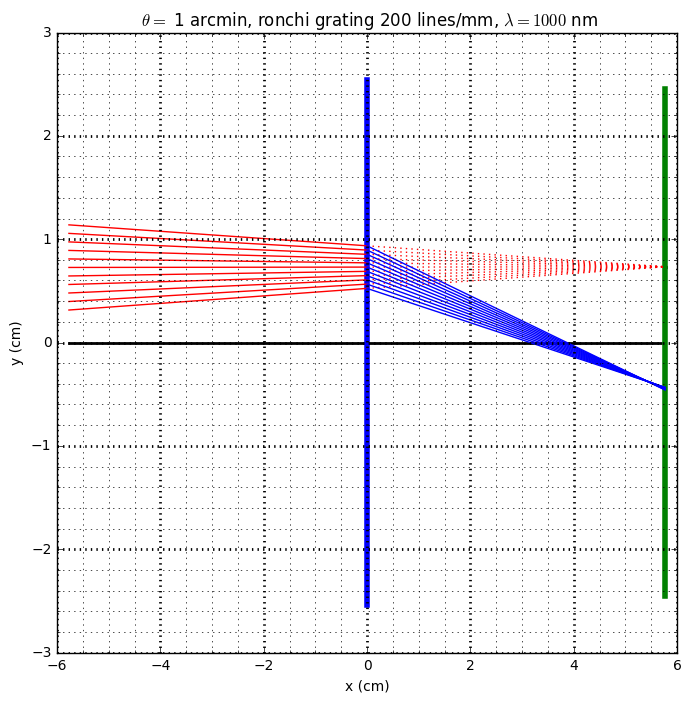

In [16]:
PlotEndBeamAnglGrating(angle,Filt_D,2,11,wl=1000.)

In [17]:
def PlotEndBeamAnglGratingSeveralWL(th,df,k,N):
    '''
    th: theta : angle of the star object in telescope field of view
    vertical planes:
    (x0,y0) : telescope aperture
    (x1,y1) : plane after converging lense, where the plot start on left
    (x2,y2) : plane where is installed the grating
    (x3,y3) : focal plane where the ccd is installed 
    df : distance focal plane - filter wheel  df=x3-x2
    k>1  : multiplicative factor such x3-x2= k*df
    N : number of optical rays lines
    '''
    
    all_wl=np.array([400.,600.,800.,1000.])
    color_line=['b-','g-','r-','y-']
    
    fig, ax = plt.subplots(1, 1, figsize=(8,8)) # image size
    
    thdeg=th*rad_to_arcmin
    title=' $\\theta =$ {:2.1f} arcmin, ronchi grating {} lines/mm, $\lambda = 400,600,800,1000$ nm'.format(int(thdeg),Ronchi_r)
    
    df=df*m_to_cm # convert into cm
                                                                                                       
    f=Tel_Focal_Length*m_to_cm # focal length in cm
    rad=Tel_Diameter*m_to_cm/2.
    
    y3=f*np.tan(th) # find the y of the focal point in cm
    
    y2max=y3*(1-df/f) + df/f*rad # maximum y at x2=f-df (filter plane)
    y2min=y3*(1-df/f) - df/f*rad # maximum y at x2=f-df (filter plane)
    
    y2=np.linspace(y2min,y2max,N) #generate the ordinate in filter plane
    
    optical_obj= []
    
    # show the Focal Point
    ax.plot([df], [y3], marker='o', markersize=3, color="red")
    
    # need Ronchi and ccd sizes
    ronchi_size=Ronchi_size*m_to_cm
    det_size=Det_size*0.1
    
    #show axes
    ax.plot([-k*df+df,df], [0,0],'k-',lw=2)
    ax.plot([0,0], [-det_size/2.,det_size/2.],'k-',lw=2)
    
    #show Ronchi Grating
    ax.plot([0,0],[-ronchi_size/2,ronchi_size/2.],color="blue",lw=4)
    
    #Show CCD
    ax.plot([df,df],[-det_size/2,det_size/2.],color="green",lw=4)
    
    
    wl=200
    
    for idx, wl in np.ndenumerate(all_wl):
        index=idx[0]                                                                                               
    # Loop on optical beam rays
        for i in range(N):
            if index==0:
                ax.plot([-k*df+df,0],[k*y2[i]-(k-1)*y3,y2[i]],"r-",lw=1)  # at left of grating
                ax.plot([0,df],[y2[i],y3],'r:',lw=1)  # zero-th order at right of grating
 

            alpha=np.arctan((y3-y2[i])/df)
            theta_out=np.arcsin(np.sin(alpha)-wl*nm_to_m/Ronchi_a)
            newy3=y2[i]+df*np.tan(theta_out)

            # first order at right of the grating
            ax.plot([0,df],[y2[i],newy3],color_line[index],lw=1)
    
    # print information
    ax.set_title(title)
    ax.set_xlabel("x (cm)")
    ax.set_ylabel("y (cm)")
    
    ax.set_aspect(2)
    
    # the gridding
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True, which='minor', color='k', linewidth=0.5)
    

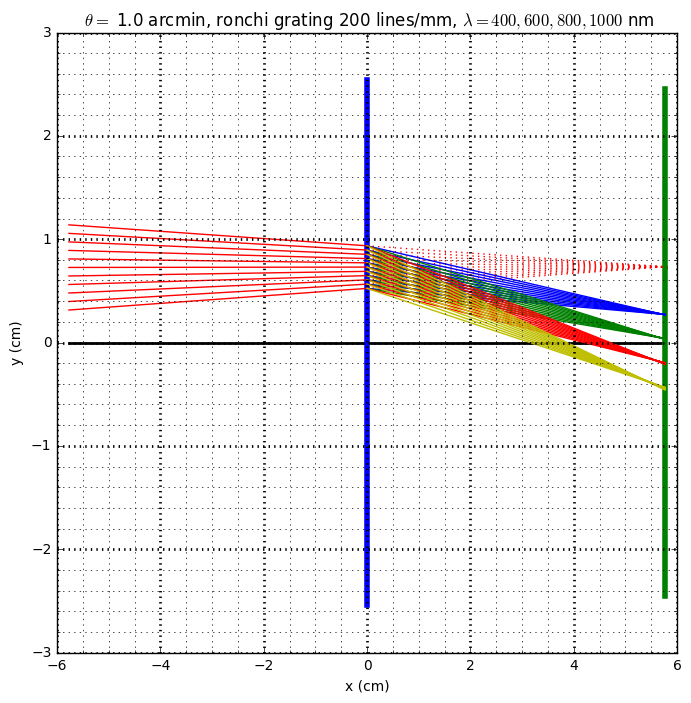

In [18]:
PlotEndBeamAnglGratingSeveralWL(angle,Filt_D,2,11)

### Generate Ray file

## All units are given in mm

In [19]:
Beam4_Rayfile='Beam4_Rayfile_RAY.xlsx'

In [20]:
NBRays=10

In [21]:
DZ=2*Filt_D*m_to_mm

In [22]:
TAN_ALPHA_MAX_X=Tel_Diameter/Tel_Focal_Length/2.

In [23]:
def GetX(NumberOfRays,tan_alpha_max_x,dz):
    '''
    Compute the X corrdinate of beam start in BeamFour
    
    input :
    - NumberOfRays : number of rays to be generated
    - half angle of incoming beam
    - dz : distance of starting beam from focal point. Must be in mm
    output:
    - the array of X position
    '''
    theX=np.zeros(NumberOfRays)
    XMAX=dz*tan_alpha_max_x
    DX=(2.*XMAX)/float(NumberOfRays)
    for i in np.arange(NumberOfRays):
        X=XMAX-float(i)*DX
        theX[i]=X
    return theX
        

In [24]:
def GetUX(X,DZ):
    '''
    Compute the UX corrdinate of beam start in BeamFour
    
    input :
    - X : array of X coordinate 
    output:
    - the array of UX position
    '''
    
    Norm=np.sqrt(X**2+DZ**2)
    UX=-X/Norm
    return UX

In [25]:
def GetUZ(X,DZ):
    '''
    Compute the UX corrdinate of beam start in BeamFour
    
    input :
    - X : array of X coordinate 
    output:
    - the array of UX position
    '''
    
    Norm=np.sqrt(X**2+DZ**2)
    UZ=DZ/Norm
    return UZ

In [26]:
X0=GetX(NBRays,TAN_ALPHA_MAX_X,DZ)

In [27]:
Y0=np.zeros(NBRays)

In [28]:
Z0=np.zeros(NBRays)

In [29]:
UX0=GetUX(X0,DZ)

In [30]:
UY0=np.zeros(NBRays)

In [31]:
UZ0=GetUZ(X0,DZ)

## Create Dataframe

In [32]:
df = pd.DataFrame()

In [33]:
df["X0"]=X0
df["Y0"]=Y0
df["Z0"]=Z0
df["UX0"]=UX0
df["UY0"]=UY0
df["UZ0"]=UZ0

In [34]:
df

,X0,Y0,Z0,UX0,UY0,UZ0
0,4.120714,0.0,0.0,-0.035692,0.0,0.999363
1,3.296571,0.0,0.0,-0.028560,0.0,0.999592
2,2.472429,0.0,0.0,-0.021424,0.0,0.999770
3,1.648286,0.0,0.0,-0.014284,0.0,0.999898
4,0.824143,0.0,0.0,-0.007143,0.0,0.999974
5,0.000000,0.0,0.0,-0.000000,0.0,1.000000
6,-0.824143,0.0,0.0,0.007143,0.0,0.999974
7,-1.648286,0.0,0.0,0.014284,0.0,0.999898
8,-2.472429,0.0,0.0,0.021424,0.0,0.999770
9,-3.296571,0.0,0.0,0.028560,0.0,0.999592


In [35]:
df.to_excel(Beam4_Rayfile)

In [36]:
Filt_size

76.19999999999999

In [38]:
2*Filt_D*m_to_mm

115.38

In [39]:
Filt_size

76.19999999999999